In [26]:
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 模块（一） 准备：输入股票代码，定义时间段

In [27]:
df = ts.get_k_data('600519',start='2001-01-01')

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


### 根据股票名字更改excel文件名
 - 参考名称（./xxx.csv）

In [28]:
df.to_csv('./maotai.csv')
df = pd.read_csv('./maotai.csv')
df.head()

,Unnamed: 0,date,open,close,high,low,volume,code
0,0,2001-08-27,5.392,5.554,5.902,5.132,406318.00,600519
1,1,2001-08-28,5.467,5.759,5.781,5.407,129647.79,600519
2,2,2001-08-29,5.777,5.684,5.781,5.640,53252.75,600519
3,3,2001-08-30,5.668,5.796,5.860,5.624,48013.06,600519
4,4,2001-08-31,5.804,5.782,5.877,5.749,23231.48,600519


### 导入机器学习模型分析

In [29]:
#数据处理
close_data = df.pop('close')
df.insert(6,'colse',close_data)
#删除df中指定一列的数据
#inplace=True覆盖原数据
df.drop(labels='Unnamed: 0',axis=1,inplace=True)
df.drop(labels='date',axis=1,inplace=True)
df.drop(labels='code',axis=1,inplace=True)
df.head()

,open,high,low,volume,colse
0,5.392,5.902,5.132,406318.00,5.554
1,5.467,5.781,5.407,129647.79,5.759
2,5.777,5.781,5.640,53252.75,5.684
3,5.668,5.860,5.624,48013.06,5.796
4,5.804,5.877,5.749,23231.48,5.782


In [30]:
from sklearn import linear_model

In [31]:
new_df = df.values
x_data = new_df[:,0:4]
y_data = new_df[:,4]

In [32]:
model = linear_model.ElasticNetCV()
model.fit(x_data,y_data)

print(model.alpha_)
print(model.coef_)

4867.829342019478
[3.18967314e-01 3.45418688e-01 3.15060653e-01 9.11702875e-05]


In [34]:
print('total data number:',len(x_data))
print('predict value：',model.predict(x_data[500,np.newaxis]))
print('real value: ',y_data[500])

total data number: 4639
predict value： [7.32059822]
real value:  4.107


### 模块（二） 准备：输入股票代码，定义时间段

In [12]:
df = ts.get_k_data('600519',start='2001-01-01')

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


### 根据股票名字更改excel文件名
 - 参考名称（./xxx.csv）

In [13]:
df.to_csv('./maotai2.csv')
df = pd.read_csv('./maotai2.csv')

#将date列转为时间序列类型
df['date']=pd.to_datetime(df['date'])

#将date列作为原数据的行索引
df.set_index('date',inplace=True)
df.head()

,Unnamed: 0,open,close,high,low,volume,code
date,,,,,,,
2001-08-27,0,5.392,5.554,5.902,5.132,406318.00,600519
2001-08-28,1,5.467,5.759,5.781,5.407,129647.79,600519
2001-08-29,2,5.777,5.684,5.781,5.640,53252.75,600519
2001-08-30,3,5.668,5.796,5.860,5.624,48013.06,600519
2001-08-31,4,5.804,5.782,5.877,5.749,23231.48,600519


### 功能1-1：输出该股票所有收盘比开盘上涨n%以上的日期
 - n可以在等式中自定义（案例中：n=3%）

In [14]:
df.loc[(df['open']-df['close'])/ df['open'] > 0.03].index

DatetimeIndex(['2001-10-10', '2001-11-07', '2001-11-16', '2001-12-20',
               '2002-01-04', '2002-01-17', '2002-01-28', '2002-04-17',
               '2002-11-08', '2003-01-02',
               ...
               '2018-10-23', '2019-07-03', '2019-09-11', '2019-11-29',
               '2020-01-03', '2020-03-16', '2020-03-18', '2020-07-16',
               '2020-07-24', '2021-01-19'],
              dtype='datetime64[ns]', name='date', length=170, freq=None)

### 功能1-2：输出该股票所有开盘比前日收盘跌幅超过n%以上的日期
 - n可以在等式中自定义（案例中：n=2%）

In [15]:
df.loc[(df['open']-df['close'].shift(1))/ df['close'] < 0.02].index

DatetimeIndex(['2001-08-28', '2001-08-29', '2001-08-30', '2001-08-31',
               '2001-09-03', '2001-09-04', '2001-09-05', '2001-09-06',
               '2001-09-07', '2001-09-10',
               ...
               '2021-01-14', '2021-01-15', '2021-01-18', '2021-01-19',
               '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-25',
               '2021-01-26', '2021-01-27'],
              dtype='datetime64[ns]', name='date', length=4569, freq=None)

### 功能1-3：查询某时间段开始，以起始年开盘价购入股票，以结束年末尾卖出股票的损益率
 - 准备：输入年份，例：xx年01月-xx年12月

In [16]:
new_df = df['2020-01':'2020-12']
df_yearlyBegin = new_df.resample('A').first()
df_yearlyEnd = new_df.resample('A').last()

In [17]:
cost = df_yearlyBegin['open'].sum()   
resv = df_yearlyEnd['close'].sum()

profit_margin = (resv - cost)/cost
print(profit_margin)

0.7712765957446809


### 功能2-1：绘制5日均线（MA5）和30日均线（30A）

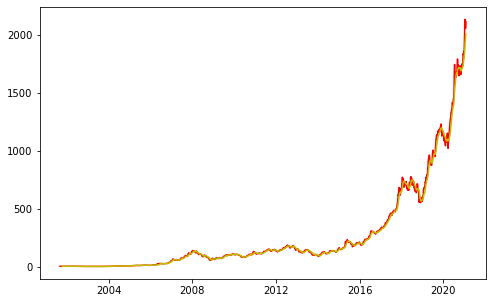

In [18]:
ma5 = df['close'].rolling(5).mean()
ma30 = df['close'].rolling(30).mean()
plt.figure(figsize=(8,5))
plt.plot(ma5,c='r')
plt.plot(ma30,c='y')
plt.show()

### 功能2-1-1放大时间段观察

4639
4639


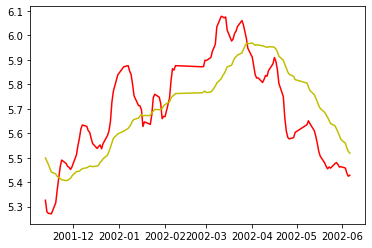

In [19]:
print(len(ma5))
print(len(ma30))
plt.plot(ma5[50:180],c='r')
plt.plot(ma30[50:180],c='y')
plt.show()

### 功能3-1找出股票中金叉和死叉的时间点

In [20]:
ma5 = ma5[30:]
ma30= ma30[30:]
s1 = ma5 < ma30
s2 = ma5 > ma30

In [21]:
#死叉
death_ex = s1 & s2.shift(1)
death_date = df[30:].loc[death_ex].index 
#金叉
golden_ex = -(s1 | s2.shift(1))
golden_date = df[30:].loc[golden_ex].index

### 功能3-2 查询从某年年初，初始资金为n元，金叉买入，死叉卖出的收益率

In [22]:
#1作为金叉的标识
#0作为死叉的标识
s1 = pd.Series(data=1,index=golden_date) 
s2 = pd.Series(data=0,index=death_date) 
s = s1.append(s2)
#存储金叉和死叉的时间并按时间排序 
s = s.sort_index() 
s = s['2020-01':'2020-12']

In [23]:
first_money = int(input('principle：'))
money = first_money 
hold = 0 #初始持有股数

for i in range(0,len(s)):
    if s[i] == 1:
        time = s.index[i]
        p = df.loc[time]['open']
        hand_count = money // (p*100)  
        hold = hand_count * 100
        money -= (hold * p) 
    else:
        death_time = s.index[i]
        p_death = df.loc[death_time]['open']
        money += (p_death * hold) 
        hold = 0

#如何判定最后一天为金叉或死叉
#直接判定hold是否=0就行了
#hold * 最后一天的收盘价
last_money = hold * df['close'][-1]

#总收益
print('profit amount:',money + last_money - first_money)
print('profit margin:',(money + last_money - first_money)/first_money)

principle：5000000
profit amount: 2758091.0
profit margin: 0.5516182
